In [1]:
# Some Python code

print('Welcome to Data 8!')
2 + 3

Welcome to Data 8!


5

In [2]:
# Stuff that will appear at the top of notebooks;
# You don't have to do anything about it.

from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

from urllib.request import urlopen 
import re
def read_url(url): 
    return re.sub('\\s+', ' ', urlopen(url).read().decode())

In [3]:
# Read two books, fast!

huck_finn_url = 'https://www.inferentialthinking.com/data/huck_finn.txt'
huck_finn_text = read_url(huck_finn_url)
huck_finn_chapters = huck_finn_text.split('CHAPTER ')[44:]

little_women_url = 'https://www.inferentialthinking.com/data/little_women.txt'
little_women_text = read_url(little_women_url)
little_women_chapters = little_women_text.split('CHAPTER ')[1:]

In [4]:
counts = Table().with_columns(
            'Jim', np.char.count(huck_finn_chapters, 'Jim'),
            'Tom', np.char.count(huck_finn_chapters, 'Tom'),
            'Huck', np.char.count(huck_finn_chapters, 'Huck'),
    )
counts

Jim,Tom,Huck
0,6,3
16,24,2
0,5,2
8,0,1
0,0,0
0,0,2
0,2,0
22,2,5
11,0,1
19,0,0


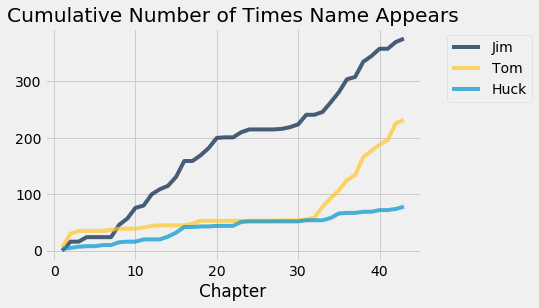

In [5]:
# Plot the cumulative counts

cum_counts = counts.cumsum().with_column('Chapter', np.arange(1, 44, 1))
cum_counts.plot(column_for_xticks=3)
plots.title('Cumulative Number of Times Name Appears');

In [6]:
counts = Table().with_columns(
            'Amy', np.char.count(little_women_chapters, 'Amy'),
            'Beth', np.char.count(little_women_chapters, 'Beth'),
            'Jo', np.char.count(little_women_chapters, 'Jo'),
            'Laurie', np.char.count(little_women_chapters, 'Laurie'),
            'Meg', np.char.count(little_women_chapters, 'Meg'),
    )
counts

Amy,Beth,Jo,Laurie,Meg
23,26,44,0,26
13,12,21,0,20
2,2,62,16,36
14,18,34,0,17
6,14,55,35,13
6,28,13,9,5
27,5,9,7,5
48,9,71,17,16
3,5,21,24,71
5,5,12,4,4


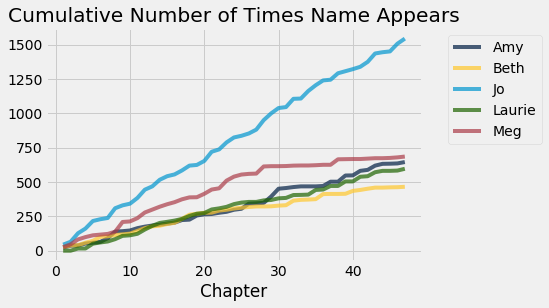

In [7]:
# Plot the cumulative counts

cum_counts = counts.cumsum().with_column('Chapter', np.arange(1, 48, 1))
cum_counts.plot(column_for_xticks=5)
plots.title('Cumulative Number of Times Name Appears');

In [8]:
# In each chapter, count the number of all characters;
# call this the "length" of the chapter.
# Also count the number of periods.

chars_periods_hf = Table().with_columns([
        'Chapter', np.arange(1,44,1),
        'Total Number of Characters', [len(s) for s in huck_finn_chapters],
        'Number of Periods', np.char.count(huck_finn_chapters, '.')
    ])
chars_periods_lw = Table().with_columns([
        'Chapter', np.arange(1,48,1),
        'Total Number of Characters', [len(s) for s in little_women_chapters],
        'Number of Periods', np.char.count(little_women_chapters, '.')
    ])

In [9]:
# The counts for Huckleberry Finn

chars_periods_hf

Chapter,Total Number of Characters,Number of Periods
1,7026,66
2,11982,117
3,8529,72
4,6799,84
5,8166,91
6,14550,125
7,13218,127
8,22208,249
9,8081,71
10,7036,70


In [10]:
# The counts for Little Women

chars_periods_lw

Chapter,Total Number of Characters,Number of Periods
1,21759,189
2,22148,188
3,20558,231
4,25526,195
5,23395,255
6,14622,140
7,14431,131
8,22476,214
9,33767,337
10,18508,185


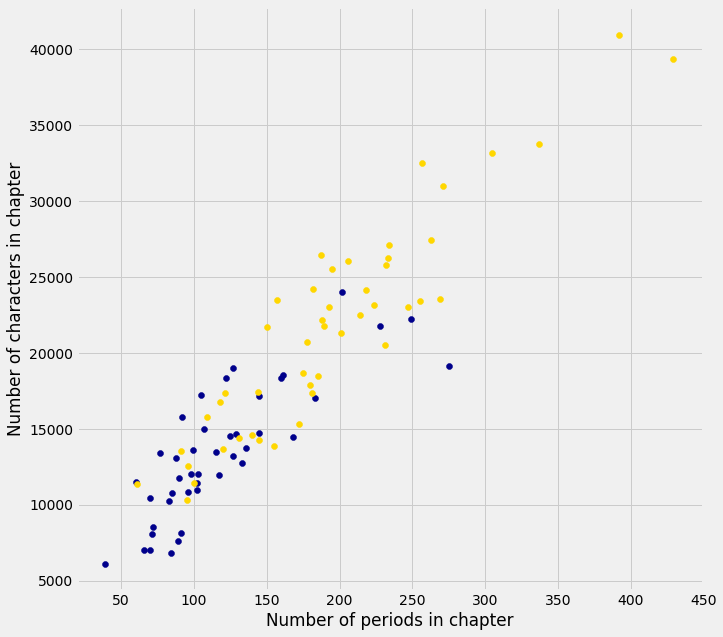

In [11]:
plots.figure(figsize=(10,10))
plots.scatter(chars_periods_hf[2], chars_periods_hf[1], color='darkblue')
plots.scatter(chars_periods_lw[2], chars_periods_lw[1], color='gold')
plots.xlabel('Number of periods in chapter')
plots.ylabel('Number of characters in chapter');